In [54]:
import numpy as np
from time import time
import seaborn as sns

<Axes: >

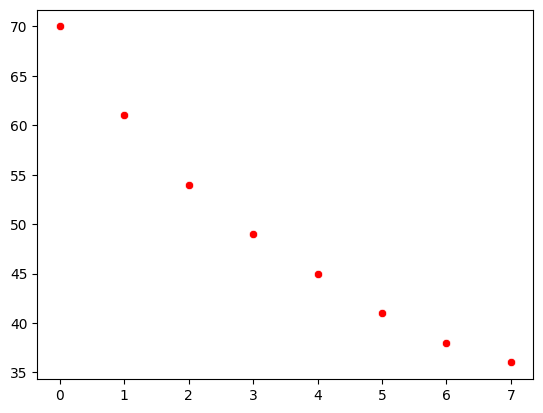

In [55]:
x_list = [0,1,2,3,4,5,6,7]
y_list = [70,61,54,49,45,41,38,36]

a_intervals = [-100,100]
b_intervals = [-100,100]
c_intervals = [-100,100]

division_interval = 100

a = np.linspace(a_intervals[0], a_intervals[1], division_interval)
b = np.linspace(b_intervals[0], b_intervals[1], division_interval)
c = np.linspace(c_intervals[0], c_intervals[1], division_interval)

best_sqe = float("inf")

best_a = 0
best_b = 0
best_c = 0

sns.scatterplot(x=x_list, y=y_list, color="r")

In [56]:
def generate_abc(a_max, a_min, b_max, b_min, c_max, c_min, division_interval):
    a = np.linspace(a_min, a_max, division_interval)
    b = np.linspace(b_min, b_max, division_interval)
    c = np.linspace(c_min, c_max, division_interval)
    
    return a,b,c

In [ ]:
x_list = np.array(x_list)
y_list = np.array(y_list)

start_time = time()
count = 0
count_found = 0
while time() - start_time < 30:
    for ai in a:
        for bi in b:
            for ci in c:
                    y = ai * np.exp(bi * x_list) + ci
                    error = y - y_list
                    sqe = np.dot(error, error)
                    count += 1
                    if sqe < best_sqe:
                        best_sqe = sqe
                        best_a = ai
                        best_b = bi
                        best_c = ci
                        count_found = count
                        print(f"Tested {count} cases, best SQE: {best_sqe}",end="\r")
    a,b,c = generate_abc(a_max=best_a * 2, a_min=best_a / 2, b_max=best_b * 2, b_min=best_b / 2, c_max=best_c * 2, c_min=best_c / 2, division_interval=division_interval)
end_time = time()

R2: 0.9994424707973149: 
  99.94% accuracy

Tested 5000000 cases
Best a: 42.744837135019964 | Best b: -0.22574227119681672 | Best c: 27.18650033743114 | SQE: 0.5460998540301011 | Time: 33.2704222202301
Final formula ~= 42.74 * exp(-0.23 * x) + 27.19


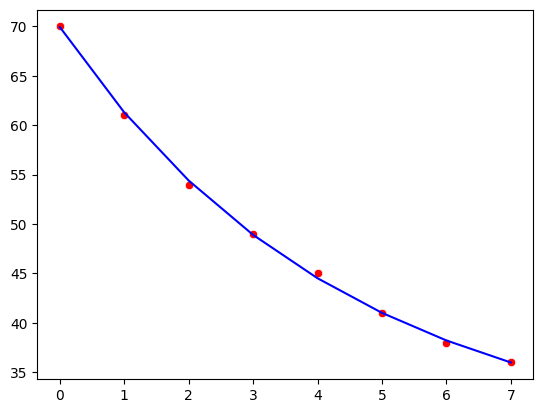

In [ ]:
y_mean = np.mean(y_list)
y_dk =y_list - y_mean
sqt = np.dot(y_dk, y_dk)

r2 = 1- (best_sqe / sqt)

print(f"R2: {r2}: \n {r2 * 100: .2f}% accuracy\n")

test_equation = best_a * np.exp(best_b * x_list) + best_c

sns.scatterplot(x=x_list, y=y_list, color="r")
sns.lineplot(x=x_list, y=test_equation, color="b")

print(f"Tested {count_found} cases")
print(f"Best a: {best_a} | Best b: {best_b} | Best c: {best_c} | SQE: {best_sqe} | Time: {end_time - start_time}")
print(f"Final formula ~= {best_a:.2f} * exp({best_b:.2f} * x) + {best_c:.2f}")